In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
podatki = pd.read_csv('podatki.csv', index_col='mesto')
pd.options.display.max_rows = 10
podatki

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.00,87011278231
2,A,PewDiePie,entertainment,3991,102.00,23798731725
4,A++,Cocomelon - Nursery Rhymes,education,469,63.80,42092956470
8,A,5-Minute Crafts,howto,3748,61.70,16163442260
9,A++,SET India,entertainment,33302,58.40,42305090305
...,...,...,...,...,...,...
4996,A-,Rels B / Flakk Daniel,music,93,2.36,818038001
4997,A-,India Today,news,76371,2.36,599401124
4998,B,THIS PROJECT IS RETIRED,music,35,2.36,582783297


In [19]:
podatki.sort_values(['ogledi', 'ocena'], ascending=[False, True])

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
1,A++,T-Series,music,13927,116.00,87011278231
9,A++,SET India,entertainment,33302,58.40,42305090305
4,A++,Cocomelon - Nursery Rhymes,education,469,63.80,42092956470
11,A+,WWE,sports,44227,50.20,36777154026
23,A++,Zee TV,entertainment,80479,36.90,34354338112
...,...,...,...,...,...,...
4527,A-,NextFlix,NaN,6,2.52,38879
4319,C+,Gjigandet e Vegjel,NaN,6,2.61,27582
3161,C,Тех.Обзор,people,12,3.23,27498


In [25]:
ocene = podatki.groupby('ocena')
ocene.size()


ocena
A       695
A+       32
A++       8
A-     1434
B       895
       ... 
C         5
C+       39
C-        1
D         2
D-       98
Length: 12, dtype: int64

[Text(0, 0.5, 'Število kanalov'), Text(0.5, 0, 'Ocena')]

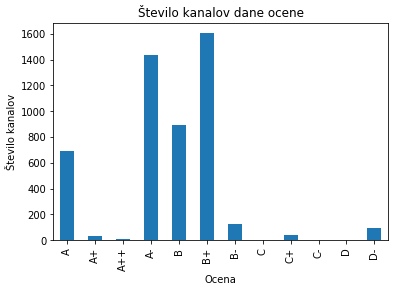

In [26]:
ocene.size().plot.bar(title='Število kanalov dane ocene').set(xlabel='Ocena', ylabel='Število kanalov')

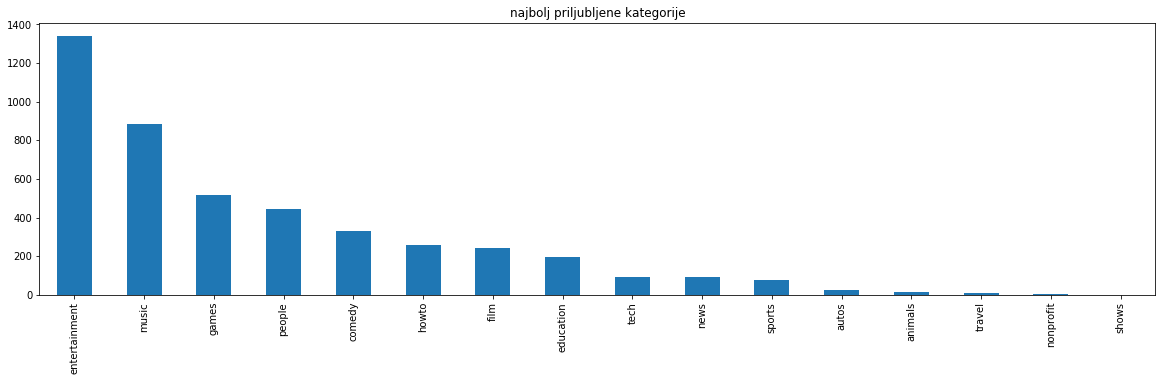

In [6]:
podatki['kategorija'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 5), title='najbolj priljubljene kategorije')

In [14]:
aktivni_youtuberji = podatki[podatki.objave >100000]
aktivni_youtuberji

,ocena,ime,kategorija,objave,vpisani,ogledi
mesto,,,,,,
92,A++,ABS-CBN Entertainment,entertainment,131964,22.60,31129203571
106,A,TEDx Talks,nonprofit,143636,21.50,3853733551
174,A,ABP NEWS,news,131685,16.90,4146718113
204,A,IndiaTV,news,142573,15.50,5402333029
315,A,IGN,games,135087,12.50,9567019192
...,...,...,...,...,...,...
3597,A,SBS Entertainment,entertainment,206261,2.96,2377381729
4112,A-,VideoYoum7 | قناة اليوم �…,news,106510,2.70,1136024874
4294,A,SBS Drama,entertainment,339825,2.63,2538927806


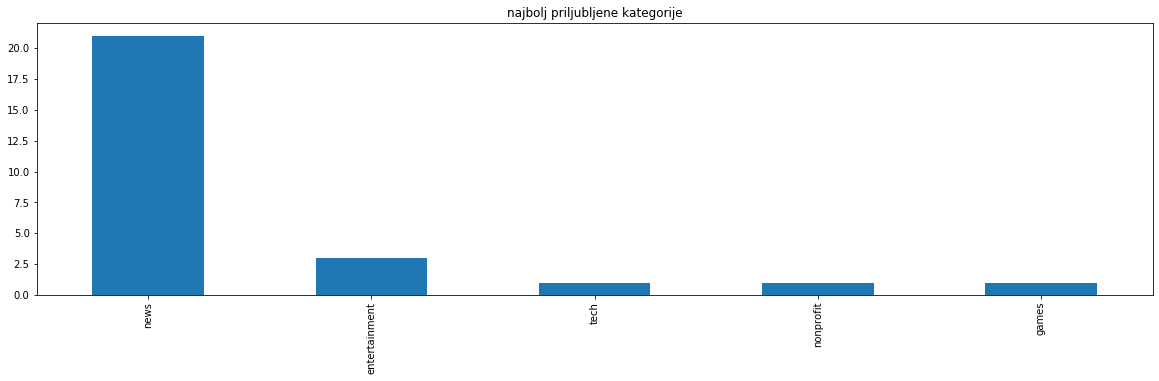

In [15]:
aktivni_youtuberji['kategorija'].value_counts().head(20).plot(kind = 'bar', figsize=(20, 5), title='najbolj priljubljene kategorije')

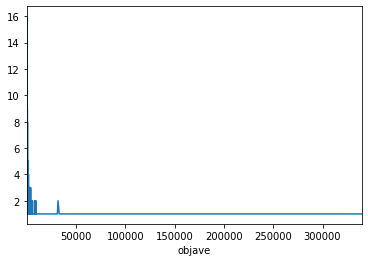

In [28]:
podatki[objave]
podatki.groupby('objave').size().plot()

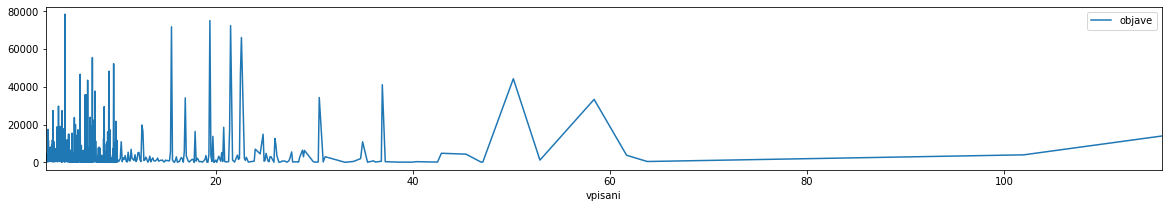

In [10]:

prvih_1000 = podatki.head(4000)
podatki_vpisani = prvih_1000.groupby('vpisani')
podatki_vpisani[['objave']].mean().plot(figsize=(20, 3))